# Marcos Barragán Corredera

https://www.linkedin.com/in/marcos-barragán-corredera-7415931b7

# Adrián González Retamosa

https://www.linkedin.com/in/adrián-gonzález-retamosa-b283a51b3

## Machine Learning

## CUNEF

### 04/12/2020

# Exploration and cleaning data analysis

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings("ignore")

In [2]:
path1 = '../data/Loan_training_set_1_4.csv'
path2 = '../data/Loan_training_set_2_4.csv'
path3 = '../data/Loan_training_set_3_4.csv'
path4 = '../data/Loan_training_set_4_4.csv'

In [3]:
df1 = pd.read_csv(path1, skiprows = 1, sep = ',')

df1.drop(df1.tail(2).index, inplace = True)

In [4]:
df2 = pd.read_csv(path2, skiprows = 1, sep = ',')

df2.drop(df2.tail(2).index, inplace = True)

In [5]:
df3 = pd.read_csv(path3, skiprows = 1, sep = ',')

df3.drop(df3.tail(2).index, inplace = True)

In [6]:
df4 = pd.read_csv(path4, skiprows = 1, sep = ',')

df4.drop(df4.tail(2).index, inplace = True)

We concatenate all of the data loadings:

In [7]:
df_g = pd.concat([df1, df2, df3, df4])

We want to check if there are duplicated values in our DataFrame, which contains all the data from the different 4 datasets loaded. To figure it out we will use _duplicated_ function of Python. 

In [8]:
duplicated = df_g[df_g.duplicated(keep = False)]

In [9]:
duplicated

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term


We check that there are no duplicated values in our DataFrame, which is great because we won't have to concern about commiting duplicated errors.

### Droping variables

Once we know the variables the dataset contains, we will apply _business knowledge_ to drop the variables present in our dataset. 

The variables which we delete in the first step are:

+ `acc_open_past_24mths`: we think that other variables are better to explain
+ `dti`
+ `loan_amnt`
+ `total_pymnt`
+ `total_pymnt_inv`
+ `total_rec_int`
+ `total_rec_late_fee`
+ `total_rec_prncp`
+ `total_rev_hi_lim`
+ `chargeoff_within_12_mths`
+ `collection_recovery_fee`
+ `collections_12_mths_ex_med`
+ `debt_settlement_flag`
+ `delinq_2yrs`
+ `earliest_cr_line`
+ `funded_amnt`
+ `funded_amnt_inv`
+ `id`
+ `inq_last_6mths`
+ `installment`
+ `issue_d`
+ `last_credit_pull_d`
+ `last_pymnt_amnt`
+ `last_pymnt_d`
+ `mo_sin_old_rev_tl_op`
+ `mo_sin_rcnt_tl`
+ `mths_since_recent_bc`
+ `mths_since_recent_inq`
+ `num_accts_ever_120_pd`
+ `num_actv_bc_tl`
+ `num_actv_rev_tl`
+ `num_bc_tl`
+ `num_il_tl`
+ `num_op_rev_tl`
+ `num_rev_accts`
+ `num_rev_tl_bal_gt_0`
+ `num_sats`
+ `num_tl_30dpd`
+ `num_tl_90g_dpd_24m`
+ `num_tl_op_past_12m`
+ `open_acc`
+ `out_prncp`
+ `out_prncp_inv`
+ `policy_code`
+ `pub_rec_bankruptcies`
+ `recoveries`
+ `revol_bal`
+ `revol_util`
+ `tax_liens`
+ `term`
+ `total_il_high_credit_limit`
+ `url`

In [10]:
df_g = df_g.drop(['acc_open_past_24mths', 
                  'dti',
                  'loan_amnt',
                  'total_pymnt',
                  'total_pymnt_inv',
                  'total_rec_int',
                  'total_rec_late_fee',
                  'total_rec_prncp',
                  'total_rev_hi_lim',
                  'chargeoff_within_12_mths',
                  'collection_recovery_fee',
                  'collections_12_mths_ex_med',
                  'debt_settlement_flag',
                  'delinq_2yrs',
                  'earliest_cr_line',
                  'funded_amnt',
                  'funded_amnt_inv',
                  'id',
                  'inq_last_6mths',
                  'installment',
                  'issue_d',
                  'last_credit_pull_d',
                  'last_pymnt_amnt',
                  'last_pymnt_d',
                  'mo_sin_old_rev_tl_op',
                  'mo_sin_rcnt_tl',
                  'mths_since_recent_bc',
                  'mths_since_recent_inq',
                  'num_accts_ever_120_pd',
                  'num_actv_bc_tl',
                  'num_actv_rev_tl',
                  'num_bc_tl',
                  'num_il_tl',
                  'num_op_rev_tl',
                  'num_rev_accts',
                  'num_rev_tl_bal_gt_0',
                  'num_sats',
                  'num_tl_30dpd',
                  'num_tl_90g_dpd_24m',
                  'num_tl_op_past_12m',
                  'open_acc',
                  'out_prncp',
                  'out_prncp_inv',
                  'policy_code',
                  'pub_rec_bankruptcies',
                  'recoveries',
                  'revol_bal',
                  'revol_util',
                  'tax_liens',
                  'term',
                  'total_il_high_credit_limit', 
                  'url'], 
                  axis='columns')

The next step is done because we started to analyze data by sampling it into 500 observations, and we saved it into `df`. Due to this, all the calls downside were done with this name. 

In order not to correct all the names below, we transform df_g into df.

In [11]:
df = df_g

We see that there are a lot of NaN values in the dataset. In our case, we would consider only those variables whose contribution of NaN values is $ < 70 \%$. Those which have more than $ 70 \% $ as wrong data values will be deleted.

In [12]:
# eliminamos las variables con mas del 70% de obs con NaN
filtro_Nan = len(df) * .7
df.dropna(thresh = filtro_Nan, axis = 'columns', inplace = True)
df.shape

(884876, 41)

These are the variables we are taking in consideration:

In [13]:
df.columns

Index(['int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state',
       'fico_range_low', 'fico_range_high', 'pub_rec', 'total_acc',
       'initial_list_status', 'last_fico_range_high', 'last_fico_range_low',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'delinq_amnt',
       'mo_sin_old_il_acct', 'mo_sin_rcnt_rev_tl_op', 'mort_acc',
       'num_bc_sats', 'num_tl_120dpd_2m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'hardship_flag', 'disbursement_method'],
      dtype='object')

In [12]:
#sns.countplot(x = df.emp_title, data = df)

We see that, after dropping variables with more than a 70% of NaN values, we have a new dataset composed of 41 columns only.

If we check the type of the variables we are working with, we will see:

In [13]:
#vemos el tipo de nuestras variables y la cantidad de NaN
df_typ = pd.merge(df.isnull().sum(axis = 0).sort_values().to_frame('NaN_values').reset_index(),
                     df.dtypes.to_frame('types').reset_index(),
                     on = 'index',
                     how = 'inner')
df_typ

,index,NaN_values,types
0,int_rate,0,object
1,last_fico_range_high,0,float64
2,hardship_flag,0,object
3,application_type,0,object
4,acc_now_delinq,0,float64
5,tot_coll_amt,0,float64
6,tot_cur_bal,0,float64
7,initial_list_status,0,object
8,delinq_amnt,0,float64
9,mort_acc,0,float64


Let see the principal statistics measures of the numeric values in our dataset once we have dropped the variables we are not going to consider:

In [14]:
round(df.describe(),3).T

,count,mean,std,min,25%,50%,75%,max
annual_inc,884876.0,77102.415,135491.609,0.0,46000.0,65000.0,92000.00,110000000.0
fico_range_low,884876.0,694.699,30.936,660.0,670.0,685.0,710.00,845.0
fico_range_high,884876.0,698.699,30.937,664.0,674.0,689.0,714.00,850.0
pub_rec,884876.0,0.226,0.623,0.0,0.0,0.0,0.00,86.0
total_acc,884876.0,25.112,12.022,2.0,16.0,23.0,32.00,169.0
last_fico_range_high,884876.0,686.138,70.031,0.0,659.0,694.0,729.00,850.0
last_fico_range_low,884876.0,675.260,104.092,0.0,655.0,690.0,725.00,845.0
acc_now_delinq,884876.0,0.006,0.083,0.0,0.0,0.0,0.00,14.0
tot_coll_amt,884876.0,253.656,9942.521,0.0,0.0,0.0,0.00,9152545.0
tot_cur_bal,884876.0,141334.587,156637.669,0.0,30180.0,80608.5,210655.00,4447397.0


### Transformation of target variable

The target variable in this case is the status of the loan, if it is paid or not. 

This target is composed of 7 different values:

+ Fully Paid: the loan is already paid.
+ Charged off: the loan is expected not to be paid. 
+ In grace period: a set length of time after the due date during which payment may be made without penalty. 
+ Late (16-30 days): the loan is out of time 16 to 30 days.
+ Late (31-120 days): delay from 1 to 4 months in the loan payment. 
+ Current: currently on the loan payment plan. 
+ Default: failure to meet the legal conditions of the loan.


We will check the loan status for different borrowers in order to see its distribution.

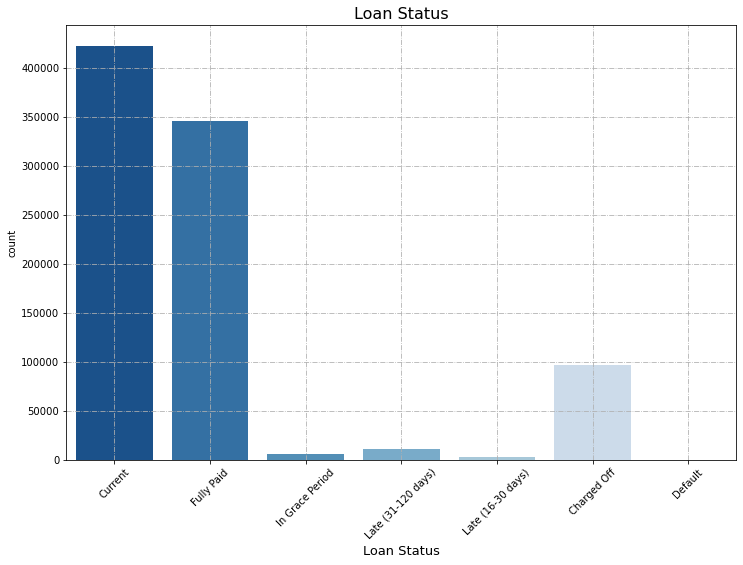

In [15]:
plt.figure(figsize = (12, 8))

sns.countplot(x = 'loan_status', data = df, palette = 'Blues_r')
plt.xlabel('Loan Status', size = 13)
plt.title('Loan Status', size = 16)
plt.grid(ls = '-.')
plt.xticks(rotation = 45);

We see that the most numerous group is the `current` status. We are loosing almost half of the observations because we cannot consider that `current` status of the loan to predict loan unpayment.

We will transform this variable into a categoric one which will take the values:

+ 0: if the loan is not paid, or if it has a delay in the payment. 
+ 1: if the loan has been paid on time. 
+ 2: if the loan is currently in term. 

In order to achieve a more efficient code, we previously define the transformation function of the target variable and then we apply it to the DataFrame we are considering. 

In [16]:
def target(x):
    if x == 'Fully Paid':
        return 1
    elif x == 'Charged Off':
        return 0
    elif x == 'In Grace Period':
        return 0
    elif x == 'Late (31-120 days)':
        return 0
    elif x == 'Late (16-30 days)':
        return 0
    elif x == 'Current':
        return 2
    elif x == 'Default':
        return 0

In [17]:
df['loan_status'] = df.loan_status.map(target)
df.loan_status.unique()

array([2, 1, 0])

To predict the probability of payment failure of the loan, we will not consider currently on term loan status, because we can't know if they are going to pay or not in the future. For this reason, we will only keep up non-paid loans (0) and paid loans (1) for the next steps in the study and prediction. This will be implemented applying a filter fot those values.

In [18]:
df_impago = df[(df.loan_status == 1) | (df.loan_status == 0)]
df_impago.loan_status.unique()

array([1, 0])

             Observations Number
Loan Status                     
Paid                      345520
Unpaid                    116671


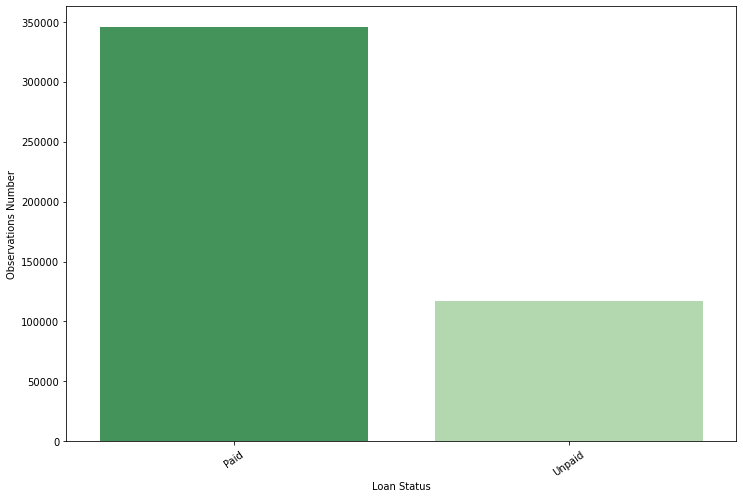

In [19]:
cuentas = pd.DataFrame({'Observations Number' : df_impago['loan_status'].value_counts(),
                        'Loan Status': ['Paid', 'Unpaid']})

print(cuentas.pivot_table('Observations Number', 'Loan Status'))

plt.figure(figsize = (12, 8))

sns.barplot(x = cuentas['Loan Status'], 
            y = cuentas['Observations Number'], 
            order = cuentas['Loan Status'],
            palette = 'Greens_r')

plt.xticks(rotation = 35);

If we calculate the paid and unpaid loans ratios, we get that the $75 \% $ of the data correspond to paid loans, and the other $25 \% $ are related to unpaid loans. 

We don't consider that 75 - 25 sampling rates are worrying, so, due to this, we are not going to implement a rebalance on our data. If we had $ 90 \% - 10 \% $ samples or even worse, then it would be necessary to rebalance data. 

Furthermore, we asked Gabriel (ETL teacher), and he told us not to worry about our ratios, so that is what we will do.

### Behaviour of other variables

Some of this non-numerical variables will be treated in the `categorical variables` sections. However, we want to check the behaviour they have against target variable before treating and cleaning them.

__Verification Status and Home Ownership__

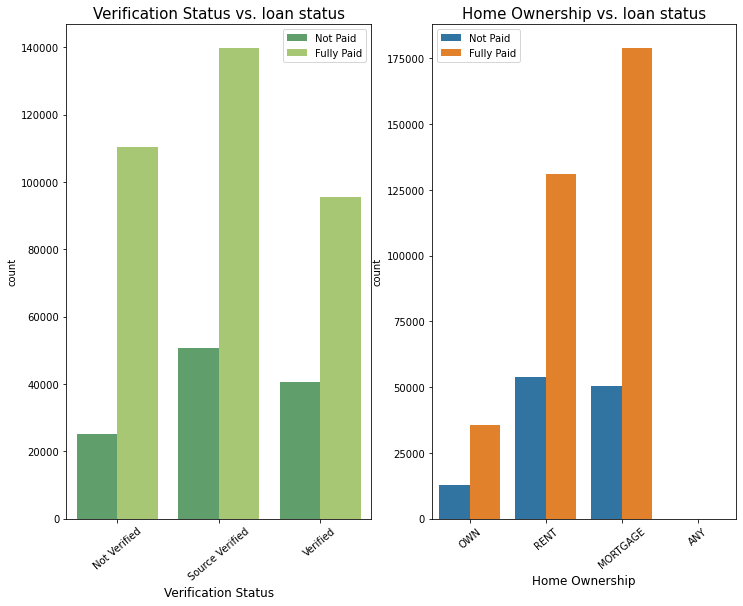

In [20]:
plt.figure(figsize=(12, 20))

plt.subplot(2, 2, 1)

sns.countplot(x = 'verification_status',
              data = df_impago, hue = df_impago.loan_status,
              palette = 'summer')
plt.legend(['Not Paid', 'Fully Paid'])
plt.title('Verification Status vs. loan status', size = 15)
plt.xticks(rotation = 40)
plt.xlabel('Verification Status', size = 12);

plt.subplot(2, 2, 2)

sns.countplot(x = df_impago.home_ownership, data = df_impago, hue = df_impago.loan_status)
plt.legend(['Not Paid', 'Fully Paid'])
plt.title('Home Ownership vs. loan status', size = 15)
plt.xticks(rotation = 40)
plt.xlabel('Home Ownership', size = 12);

We note that the highest number of loans are given to people who are home-mortgaged. This could be due to those people have asked for the loan in order to pay this mortgages.

It is important to see that there are not loans given matched to "any" home ownership option. This is, somehow, logical.

__Employment length__

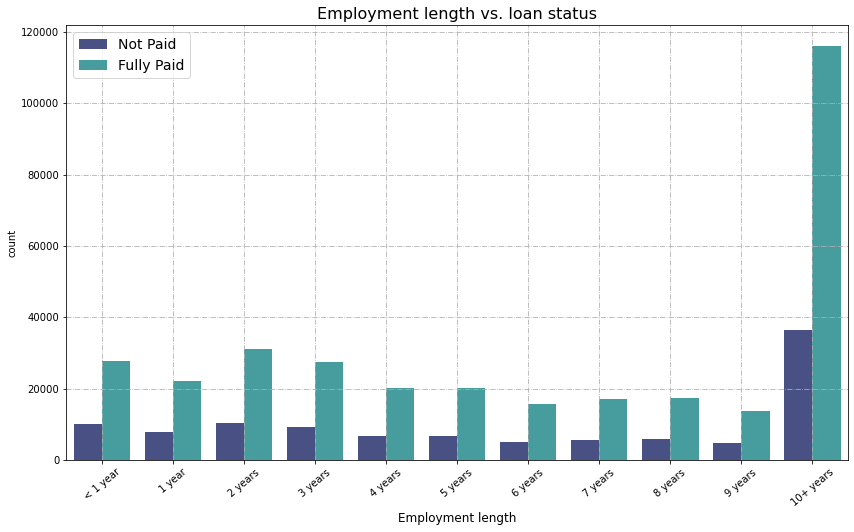

In [21]:
plt.figure(figsize = (14, 8))

order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]

sns.countplot(x = df_impago.emp_length, 
              data = df_impago, 
              hue = df_impago.loan_status, 
              order = order, 
              palette = 'mako')

plt.legend(['Not Paid', 'Fully Paid'], fontsize = 14)
plt.grid(ls = '-.')
plt.xlabel('Employment length', size = 12)
plt.title('Employment length vs. loan status', size = 16)
plt.xticks(rotation = 40);

We see that the most unpaid loans are those which were given to people who had been working for more than 10 years. But, on the other hand, this is not really worrying, because if we calculate the ratio of the number of unpaid loans and the number of paid ones, we will check that it is 0.33, quite similar to the ratios of the other values of the lenght employnment type.

It is also logical to see that after 1, 2 or 3 years working, people start to ask for credits and loans, because they want to buy  car, start a home-mortgage, etc. That's the reason why they appear to be over the mean. 

We will transform this variable into a dicotomic one, and we will consider it as a categorical observation.

__Loan Purposes__

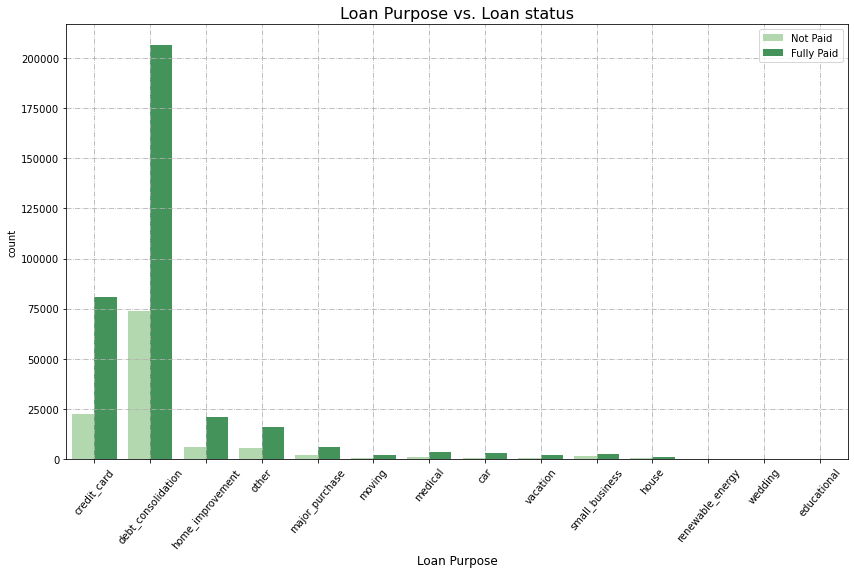

In [22]:
plt.figure(figsize=(14, 8))

sns.countplot(x = df_impago.purpose, data = df_impago, hue = df_impago.loan_status, palette = 'Greens')
plt.legend(['Not Paid', 'Fully Paid'], loc = 'upper right')
plt.grid(ls = '-.')
plt.title('Loan Purpose vs. Loan status', size = 16)
plt.xlabel('Loan Purpose', size = 12)
plt.xticks(rotation = 50);

We see that most of the loans are given to debt consolidation and credit card purposes. Both of them have nearly a 25% of probability of commiting default. This ratio is more or less the same for almost every purpose.

We saw something curious in small_business purpose values. Let's zoom to see it clearly:

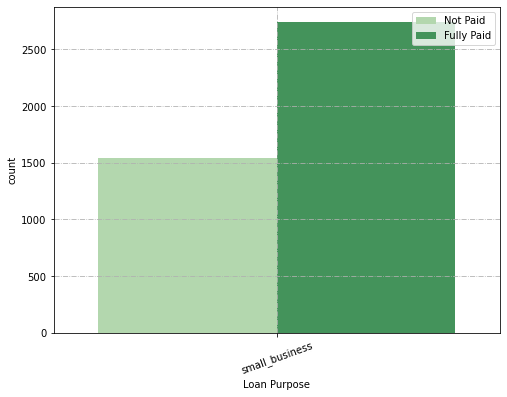

In [23]:
small_busi = df_impago[df_impago.purpose == 'small_business']

plt.figure(figsize=(8, 6))

sns.countplot(x = small_busi.purpose,
              data = small_busi, 
              hue = small_busi.loan_status,
              palette = 'Greens')
                            
plt.legend(['Not Paid', 'Fully Paid'], loc = 'upper right')
plt.grid(ls = '-.')
plt.xlabel('Loan Purpose')
plt.xticks(rotation = 20);

Let's zoom on the _wedding, renewable energy and educational_ purposes to see how they behave against loan payment status.

The `small_business` purpose for the loan is a value with a high ratio of number of unpaid/paid. This would have to be taken in count in order to achieve better predictive model results. We mean, if a borrower asks for a loan to use it for a small business we should be carefull analyzing both business and personal characteristics.

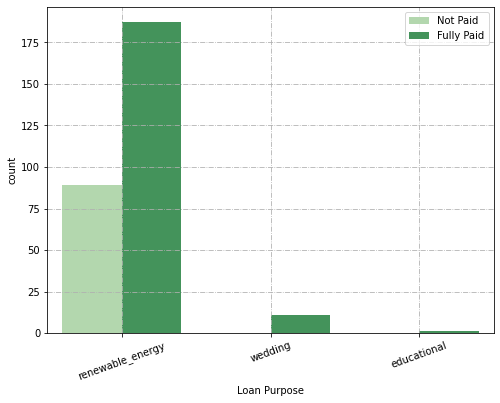

In [24]:
wed_renew_educ_purpose = df_impago[(df_impago.purpose == 'wedding')|(df_impago.purpose == 'renewable_energy')|(df_impago.purpose == 'educational')]

wed_renew_educ_purpose

plt.figure(figsize=(8, 6))

sns.countplot(x = wed_renew_educ_purpose.purpose,
              data = wed_renew_educ_purpose, 
              hue = wed_renew_educ_purpose.loan_status,
              palette = 'Greens')
                            
plt.legend(['Not Paid', 'Fully Paid'], loc = 'upper right')
plt.grid(ls = '-.')
plt.xlabel('Loan Purpose')
plt.xticks(rotation = 20);

This  becomes even more noticeable when we check out `renewable_energy` purpose: the ratio of unpaid vs. paid loan status is nearly 50%. 

But the most unbalanced purposes are those which refer to `wedding` and `educational`. Both of them have a 100% ratio of unpayment loan status. 

It is true that, in comparision to other purposes, there are only few (less than 200) renewable energy, wedding and educational loan borrowers, so it appears not to be so worrying as we originally thinked. For a dataset of 400k observations (after treating and cleaning the initial 800K entries) this shouldn't even be taken into consideration. However, our mission is to portray this lending-data behaviour, so that is why we show it up.

__FICO scores__

The FICO score is a credit score created to use the details of borrowers' credit reports to assess credit risk and determine whether to extend credit. This FICO scores take into account five areas to determine creditworthiness: payment history, current level of indebtedness, types of credit used, length of credit history, and new credit accounts.

We have the lower and higher FICO rate of each borrower. We want to represent it in order to see if the FICO rate affects to the loan payment. 

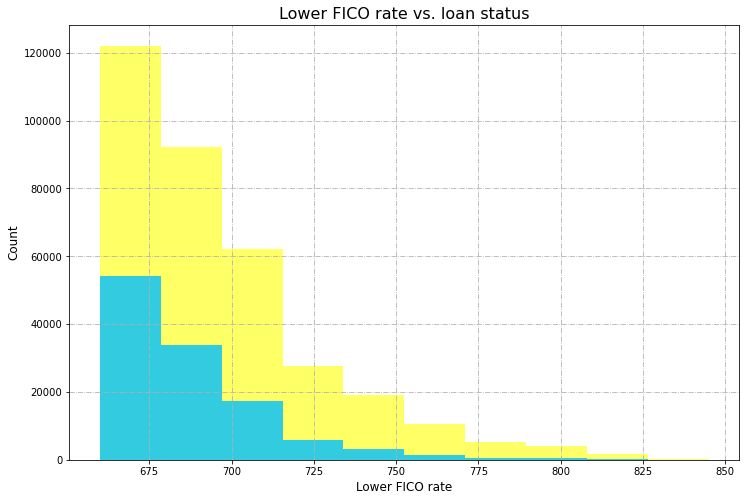

In [25]:
plt.figure(figsize=(12, 8))

df_impago[df_impago.loan_status == 1]['fico_range_low'].hist(alpha = 0.6, 
                                                             color = 'yellow')
df_impago[df_impago.loan_status == 0]['fico_range_low'].hist(alpha = 0.8, 
                                                             color = 'deepskyblue')
plt.xlabel('Lower FICO rate', 
           size = 12)
plt.ylabel('Count', 
           size = 12)
plt.grid(ls = '-.')
plt.title('Lower FICO rate vs. loan status', 
          size = 16);

We see that the the lower the FICO rate is, the higher unpayment risk we get. This is what we expected from the beggining.

### Division into numeric and categoric variables

We will treat separately both numeric and categoric/non numeric variables in order to scale those which are numeric, fix problems from both and then concatening them into a one DataFrame. 

#### a) Numeric ones

In [26]:
df_n = df_impago.drop(['addr_state',
                       'application_type',
                       'disbursement_method',
                       'emp_length',
                       'loan_status',
                       'emp_title',
                       'grade',
                       'hardship_flag',
                       'home_ownership',
                       'initial_list_status',
                       'purpose',
                       'pymnt_plan',
                       'title',
                       'verification_status',
                       'sub_grade',
                       'zip_code'], axis = 1)

In [27]:
df_n.shape

(462191, 25)

We see that we have 25 variables which are numeric. 

Furthermore, we are interested in discovering the class of each numeric variable (if it is objetc, float, integer, etc). We can implement it easily by:

In [28]:
for variable in list(df_n.columns):
    print(variable + ' --> ' + str(df_n[variable].nunique()) + ' , data type: '  + str(df_n[variable].dtype))

int_rate --> 200 , data type: object
annual_inc --> 29484 , data type: float64
fico_range_low --> 38 , data type: float64
fico_range_high --> 38 , data type: float64
pub_rec --> 27 , data type: float64
total_acc --> 127 , data type: float64
last_fico_range_high --> 72 , data type: float64
last_fico_range_low --> 71 , data type: float64
acc_now_delinq --> 7 , data type: float64
tot_coll_amt --> 8479 , data type: float64
tot_cur_bal --> 242649 , data type: float64
avg_cur_bal --> 58056 , data type: float64
bc_open_to_buy --> 51462 , data type: float64
bc_util --> 1328 , data type: float64
delinq_amnt --> 953 , data type: float64
mo_sin_old_il_acct --> 478 , data type: float64
mo_sin_rcnt_rev_tl_op --> 228 , data type: float64
mort_acc --> 35 , data type: float64
num_bc_sats --> 46 , data type: float64
num_tl_120dpd_2m --> 5 , data type: float64
pct_tl_nvr_dlq --> 544 , data type: float64
percent_bc_gt_75 --> 196 , data type: float64
tot_hi_cred_lim --> 250593 , data type: float64
total_b

Every numeric variable is coded as float64 except interest rate, which is expressed in a percentage. In order to have them in the same form and type as the others, we will transform it by deleting the % symbol and codifying it as a float variable. 

In [29]:
df_n['int_rate'] = df_n.int_rate.str.strip('%').astype(float)

# Check it is correct: 

df_n.int_rate.head(5)

8      7.35
10    24.85
24     7.35
42    16.02
91    16.02
Name: int_rate, dtype: float64

If we represent it to see how it behaves against loan status:

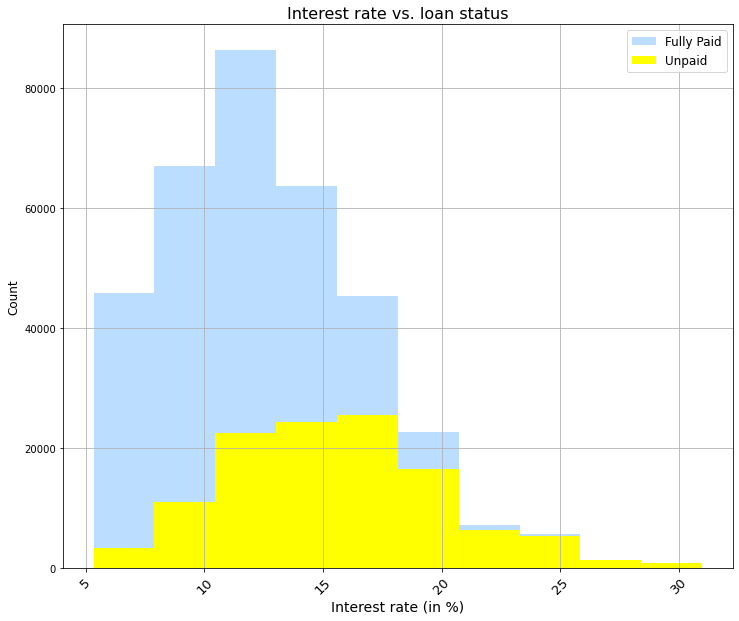

In [30]:
plt.figure(figsize=(12, 10))

df_n[df_impago.loan_status == 1]['int_rate'].hist(label = 'Fully Paid', alpha = 0.3, color = 'dodgerblue')
df_n[df_impago.loan_status == 0]['int_rate'].hist(label = 'Unpaid', alpha = 1, color = 'yellow')
plt.legend(fontsize = 12)
plt.title('Interest rate vs. loan status', size = 16)
plt.xlabel('Interest rate (in %)', size = 14)
plt.ylabel('Count', size = 12)
plt.xticks(rotation = 45, size = 13);

We check that the most unpaid loans occur when the interest rate is over $20 \%$. This might be a strategy from the credit/loan lender company: the higher probability of dfault you appear to have, the higher interest rates you get. 

Once we have transformed all the numeric variables into float64 and int values, we want to check how the correlation matrix form is.

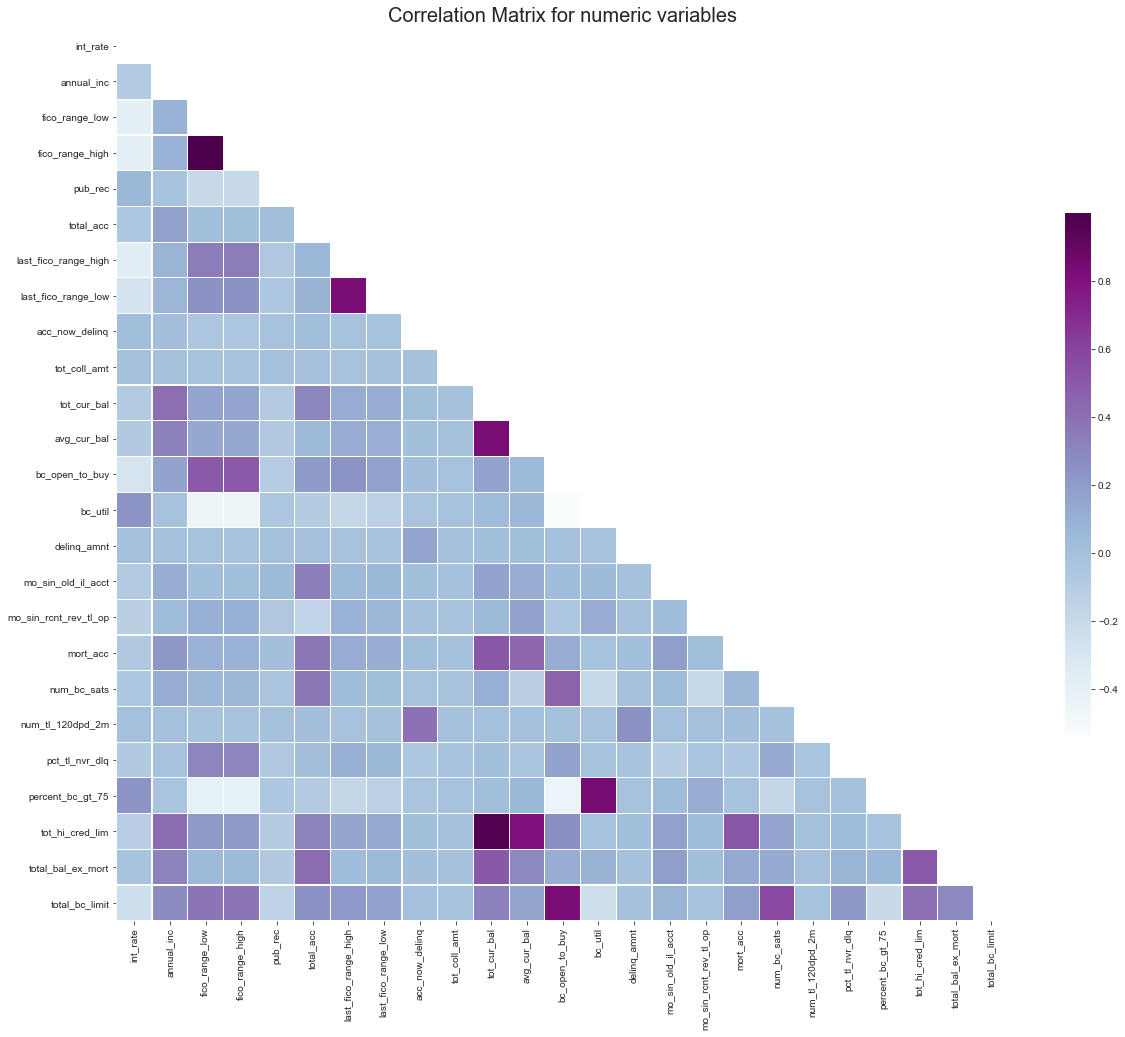

In [31]:
correlation_matrix = df_n.corr()

mask = np.zeros_like(correlation_matrix, 
                     dtype = np.bool) #drop off upper part of cor matrix.

mask[np.triu_indices_from(mask)] = True

sns.set_style(style = 'ticks') 


f, ax = plt.subplots(figsize=(20, 24)) #dibujamos el lienzo 

# cmap = sns.diverging_palette(250, 700, as_cmap=True) #gama de colores que elegimos 

sns.heatmap(correlation_matrix, 
            mask = mask,
            cmap = 'BuPu', 
            square = True,
            linewidths=.1, 
            cbar_kws = {"shrink": .4}, 
            ax=ax)   #es un grafico de mapa de calor

plt.xticks(rotation = 90)
plt.title('Correlation Matrix for numeric variables', 
          size = 20);

The correlation between numeric variables are not high except in some variables, like FICO representing values, which are really related to each other (which is normal). Anyway, those variables are really important when considering to give or not to give a loan to a person, so we would not delete them.

Let's see what happens with the categorical columns.

#### b) Categorical variables:

Knowing the data we are taking in consideration permit us to discern whether a variable is categoric or not. In our study, we find out these variables as categorical: 

In [32]:
df_c = df_impago.loc[:,['addr_state',
                        'application_type',
                        'disbursement_method',
                        'emp_length',
                        'emp_title',
                        'grade',
                        'hardship_flag',
                        'home_ownership',
                        'initial_list_status',
                        'loan_status',
                        'purpose',
                        'pymnt_plan',
                        'title',
                        'verification_status',
                        'sub_grade',
                        'zip_code']]
# disbursement_method, earliest_cr_line, hardship_flag, initial_list_status, issue_d, last_credit_pull_d, 
# last_pymnt_d, policy_code, title, sub_grade, id, zip_code

Anyway, applying _business knowledge_ once again, we decided to drop some of those variables because we considered them as unusefull for our case. 

In [33]:
# Nos quedamos solo con las categoricas que vamos a incluir en los modelos
df_c.drop(['addr_state',
           'disbursement_method',
           'initial_list_status',
           'title',
           'sub_grade',
           'emp_title',
           'zip_code'], 
            axis = 'columns', 
            inplace = True)

In [34]:
df_c.head(5)

,application_type,emp_length,grade,hardship_flag,home_ownership,loan_status,purpose,pymnt_plan,verification_status
8,Individual,6 years,A,N,OWN,1,credit_card,n,Not Verified
10,Individual,2 years,E,N,RENT,1,debt_consolidation,n,Source Verified
24,Individual,7 years,A,N,MORTGAGE,1,debt_consolidation,n,Not Verified
42,Individual,7 years,C,N,RENT,1,debt_consolidation,n,Source Verified
91,Individual,7 years,C,N,MORTGAGE,1,debt_consolidation,n,Verified


We cannot work with variables like this in our models. In order to be able to use them to study our predictive models, we will transform them into binary variables. 

This is a bit laborius, but it has to be done to continue with the models.

__Application type__

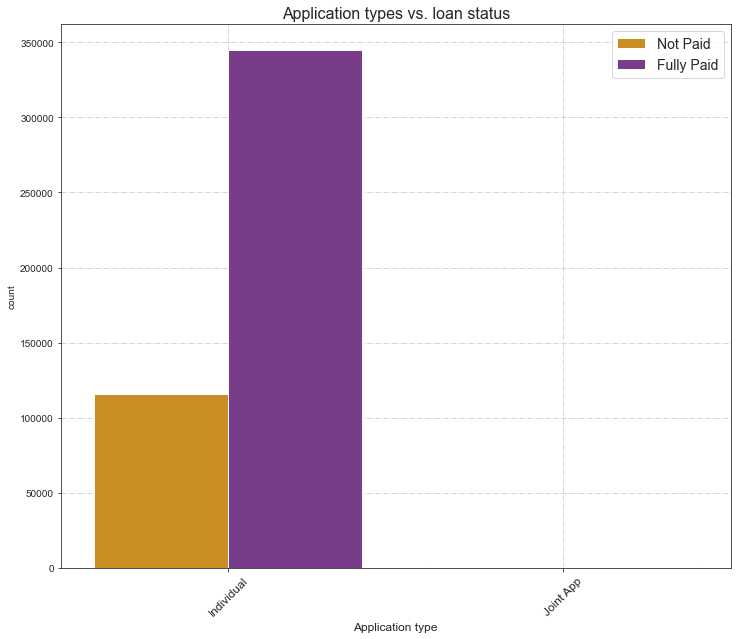

In [35]:
plt.figure(figsize = (12, 10))

sns.countplot(x = 'application_type',
              data = df_c,
              hue = df_impago.loan_status, 
              palette = 'CMRmap_r')

plt.xlabel('Application type', size = 12)
plt.title('Application types vs. loan status', size = 16)
plt.grid(ls = '-.')
plt.xticks(rotation = 45, size = 12)
plt.legend(['Not Paid', 'Fully Paid'], fontsize = 14);

It is obvious that almost all the loans have been borrowed individually. Only a few are shared.

We transform this variable into a categorical one by applying:

In [36]:
df_c['application_type'] = df_c.application_type.map(lambda x: 0 if ( x == 'Individual')  else 1)

__Employment length__

First of all we will transform the employnment length into 3 stages. This is: 

+ `0`: if the person who is asking for the loan has been working from 1 to 4 years.
+ `1`: if the person who asks for the loan has been working from 5 to 9 years.
+ `2`: if the person has been working more than 10 years.

The problem with this variable is that there are NaN values. We will consider them as if borrowers have not ever worked, so we will asign them as a 0.

In [37]:
def años(x):
    if (x == '1 year') | (x == '2 years') | (x == '3 years') | (x == '4 years'):
        return 0
    elif (x == '5 year') | (x == '6 years') | (x == '7 years') | (x == '8 years') | (x == '9 years'):
        return 1
    elif x == '10+ years':
        return 2
#MARIO Y GON SOLO EN DOS 

In [38]:
df_c['emp_length'] = df_c.emp_length.map(años)

df_c['emp_length'] = df_c.emp_length.fillna(0)

In [39]:
df_c.emp_length.unique()

array([1., 0., 2.])

__Risk grade__

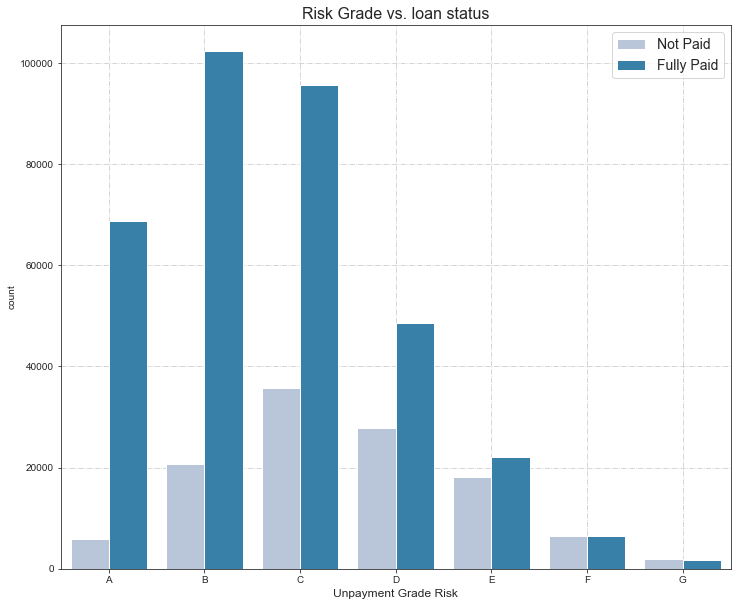

In [40]:
plt.figure(figsize = (12, 10))

order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

sns.countplot(x = 'grade',
              data = df_c,
              hue = df_impago.loan_status, 
              palette = 'PuBu',
              order = order)

plt.xlabel('Unpayment Grade Risk', size = 12)
plt.title('Risk Grade vs. loan status', size = 16)
plt.grid(ls = '-.')
plt.legend(['Not Paid', 'Fully Paid'], fontsize = 14);

We see that onwards `D` grade the risk of getting unpayment gets higher. For `F` and `G` grades is even more worrying because it becomes $ 50 \% - 50 \% $, and it has to be really taken in count in order to enhance our predictive models.

In this line, we will transform the grade of risk for the loan as binary. Then, we asign:

+ `0`: if the risk is low, or, similarly, the person is not expected to commit fraud. 
+ `1`: if the risk is high, or there are risk for the loan to be unpaid.

In [41]:
def riesgo(x):
    if (x == 'A') | (x == 'B') | (x == 'C'):
        return 0
    elif (x == 'D') | (x == 'E') | (x == 'F') | (x == 'G'):
        return 1

In [42]:
df_c['grade'] = df_c.grade.map(riesgo)

In [43]:
df_c.grade.unique()

array([0, 1])

__Home ownership__

Third, we study the home ownership of the loan borrowers. We will codify them as binary, setting the differences on:

+ `0`: if the borrower has none own property (including a rent).
+ `1`: if the borrower has a mortgage or has his own home.

It has been already represented upper in this work, so we will not plot it again.

In [44]:
df_g.home_ownership.unique()

array(['OWN', 'MORTGAGE', 'RENT', 'ANY', 'NONE'], dtype=object)

In [45]:
def propiedad(x):
    if (x == 'OWN') | (x == 'MORTGAGE'):
        return 1
    else:
        return 0

In [46]:
df_c['home_ownership'] = df_c.home_ownership.map(propiedad)

In [47]:
df_c.home_ownership.unique()

array([1, 0])

__Loan Purposes__

Other variable we consider as an important one is the purpose for which the borrower is asked to be given the loan. We will codify it as:

+ `0`: if the borrower wants the credit for businesses, debt payments, medical purposes or major purchases.
+ `1`: if it is for enhancing his/her life conditions.
+ `2`: other purposes like vacation, wedding, education, etc.

In [48]:
df_c.purpose.unique()

array(['credit_card', 'debt_consolidation', 'home_improvement', 'other',
       'major_purchase', 'moving', 'medical', 'car', 'vacation',
       'small_business', 'house', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

In [49]:
def proposito(x):
    if (x == 'small_business') | (x == 'debt_consolidation') | (x == 'major_purchase' ) | (x == 'medical'):
        return 0
    elif (x == 'credit_card') | (x == 'home_improvement') | (x == 'house') | (x == 'car'):
        return 1
    else:
        return 2

In [50]:
df_c['purpose'] = df_c.purpose.map(proposito)

In [51]:
df_c.purpose.unique()

array([1, 0, 2])

We transform the payment plan into binary by considering whether the borrower has contracted a payment plan or not.

In [52]:
df_c['pymnt_plan'] = df_c.pymnt_plan.map(lambda x: 0 if (x == 'n') else 1)

In [53]:
df_c.pymnt_plan.unique()

array([0, 1])

The verification status variable will be transformed into binary by allocating:

+ `0`: if the incomes or rent of the borrower has not been verified.
+ `1`: if they have been verified.

In [54]:
df_c['verification_status'] = df_c.verification_status.map(lambda x: 0 if (x == 'Not Verified') else 1)

In [55]:
df_c.verification_status.unique()

array([0, 1])

__Hardship flag__

Now is time to consider whether the borrower is on a hardship plan with the credit company or the bank or not.

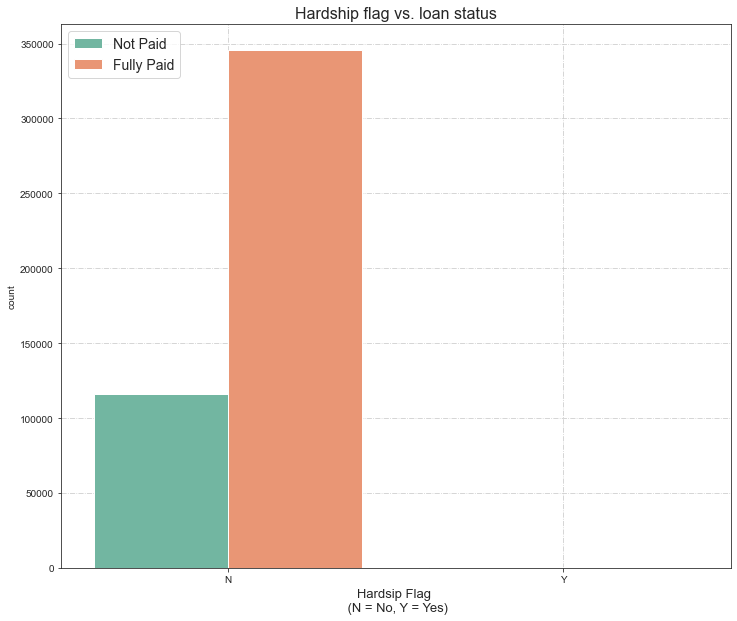

In [56]:
plt.figure(figsize = (12, 10))

sns.countplot(x = 'hardship_flag',
              data = df_c,
              hue = df_impago.loan_status, 
              palette = 'Set2')

plt.xlabel('Hardsip Flag \n (N = No, Y = Yes)', size = 13)
plt.title('Hardship flag vs. loan status', size = 16)
plt.grid(ls = '-.')
plt.legend(['Not Paid', 'Fully Paid'], fontsize = 14);

Nearly the 100% of the borrowers haven't asked for a hardship flag.

In [57]:
df_c['hardship_flag'] = df_c.hardship_flag.map(lambda x: 0 if (x == 'N') else 1)

In [58]:
df_c['hardship_flag'].unique()

array([0, 1])

We check out if we have correctly transformed all our categorical variables:

In [59]:
df_c.head(5)

,application_type,emp_length,grade,hardship_flag,home_ownership,loan_status,purpose,pymnt_plan,verification_status
8,0,1.0,0,0,1,1,1,0,0
10,0,0.0,1,0,0,1,0,0,1
24,0,1.0,0,0,1,1,0,0,0
42,0,1.0,0,0,0,1,0,0,1
91,0,1.0,0,0,1,1,0,0,1


We check the info of the categrical variables we have created:

In [60]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462191 entries, 8 to 421094
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   application_type     462191 non-null  int64  
 1   emp_length           462191 non-null  float64
 2   grade                462191 non-null  int64  
 3   hardship_flag        462191 non-null  int64  
 4   home_ownership       462191 non-null  int64  
 5   loan_status          462191 non-null  int64  
 6   purpose              462191 non-null  int64  
 7   pymnt_plan           462191 non-null  int64  
 8   verification_status  462191 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 45.3 MB


We need this variables will be object in order to transform with Pipelines

In [61]:
df_c = df_c.astype(object)

In [62]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462191 entries, 8 to 421094
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   application_type     462191 non-null  object
 1   emp_length           462191 non-null  object
 2   grade                462191 non-null  object
 3   hardship_flag        462191 non-null  object
 4   home_ownership       462191 non-null  object
 5   loan_status          462191 non-null  object
 6   purpose              462191 non-null  object
 7   pymnt_plan           462191 non-null  object
 8   verification_status  462191 non-null  object
dtypes: object(9)
memory usage: 45.3+ MB


### Concatenation of numeric and categorical DataFrames

In [63]:
df_unido = pd.DataFrame(pd.concat([df_n, df_c], axis = 1))

In [64]:
df_unido.head(12)

,int_rate,annual_inc,fico_range_low,fico_range_high,pub_rec,total_acc,last_fico_range_high,last_fico_range_low,acc_now_delinq,tot_coll_amt,...,total_bc_limit,application_type,emp_length,grade,hardship_flag,home_ownership,loan_status,purpose,pymnt_plan,verification_status
8,7.35,153000.0,720.0,724.0,1.0,46.0,724.0,720.0,0.0,0.0,...,28100.0,0,1,0,0,1,1,1,0,0
10,24.85,50000.0,685.0,689.0,0.0,5.0,669.0,665.0,0.0,0.0,...,3600.0,0,0,1,0,0,1,0,0,1
24,7.35,110000.0,710.0,714.0,0.0,27.0,719.0,715.0,0.0,0.0,...,83700.0,0,1,0,0,1,1,0,0,0
42,16.02,51979.0,690.0,694.0,2.0,21.0,659.0,655.0,0.0,251.0,...,18800.0,0,1,0,0,0,1,0,0,1
91,16.02,75000.0,685.0,689.0,0.0,10.0,684.0,680.0,0.0,0.0,...,3000.0,0,1,0,0,1,1,0,0,1
92,30.79,160000.0,675.0,679.0,1.0,36.0,699.0,695.0,0.0,0.0,...,26400.0,0,2,1,0,1,1,1,0,1
104,20.00,33000.0,665.0,669.0,0.0,19.0,599.0,595.0,0.0,0.0,...,7200.0,0,1,1,0,0,0,1,0,0
176,11.99,63000.0,665.0,669.0,0.0,17.0,714.0,710.0,0.0,254.0,...,8800.0,0,0,0,0,1,1,1,0,1
181,18.06,85000.0,665.0,669.0,0.0,10.0,634.0,630.0,0.0,0.0,...,11350.0,0,0,1,0,0,0,0,0,1
207,10.91,38000.0,675.0,679.0,0.0,16.0,734.0,730.0,0.0,0.0,...,9800.0,0,1,0,0,1,1,0,0,1


In [65]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462191 entries, 8 to 421094
Data columns (total 34 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   int_rate               462191 non-null  float64
 1   annual_inc             462191 non-null  float64
 2   fico_range_low         462191 non-null  float64
 3   fico_range_high        462191 non-null  float64
 4   pub_rec                462191 non-null  float64
 5   total_acc              462191 non-null  float64
 6   last_fico_range_high   462191 non-null  float64
 7   last_fico_range_low    462191 non-null  float64
 8   acc_now_delinq         462191 non-null  float64
 9   tot_coll_amt           462191 non-null  float64
 10  tot_cur_bal            462191 non-null  float64
 11  avg_cur_bal            462185 non-null  float64
 12  bc_open_to_buy         457303 non-null  float64
 13  bc_util                456978 non-null  float64
 14  delinq_amnt            462191 non-nu

Once we have the concatenation for both numeric and categorical variables, we export it to a csv document in order to have our cleaned data ready to load in other steps. 

In [181]:
df_unido.to_csv('../data/df_unido.csv')

### Scaling variables and PipeLines

We execute now a pipeline function in order to scale our variables, transform our NaN values and trear apart the categorical variables in a more efficient way.

In [66]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [67]:
numeric_features = df_unido.select_dtypes(include=['int64', 'float64','int32']).columns

In [68]:
preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

In [ ]:
pl2 = '../pipelines/tratamiento1.sav'

pickle.dump(preprocessor1, open(pl2, 'wb'))

We saved the pipelines to use in other notebooks

### Data Splitting

In [73]:
X = df_unido.drop('loan_status', axis=1)

y = df_unido['loan_status']
Y = y.astype(int)

In [74]:
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.3,
                                                    random_state=1789)

In [ ]:
x_train.to_csv('../data/x_train.csv', index=False)
x_test.to_csv('../data/x_test.csv', index=False)
y_train.to_csv('../data/y_train.csv', index=False)
y_test.to_csv('../data/y_test.csv', index=False)

### References

+ https://scikit-learn.org/stable/modules/preprocessing.html
+ https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
+ https://towardsdatascience.com/stop-one-hot-encoding-your-categorical-variables-bbb0fba89809
+ https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf